In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
df = pd.read_csv('cleaned_mta_data.csv')
df.head()

,Unnamed: 0,STATION,DATE,TIME,ENTRIES_COUNT,EXITS_COUNT,TOTAL_TRAFFIC,DATE_TIME,day_of_week
0,1,59 ST,04/29/2017,04:00:00,37.0,4.0,41.0,2017-04-29 04:00:00,Saturday
1,2,59 ST,04/29/2017,08:00:00,33.0,34.0,67.0,2017-04-29 08:00:00,Saturday
2,3,59 ST,04/29/2017,12:00:00,153.0,100.0,253.0,2017-04-29 12:00:00,Saturday
3,4,59 ST,04/29/2017,16:00:00,249.0,76.0,325.0,2017-04-29 16:00:00,Saturday
4,5,59 ST,04/29/2017,20:00:00,309.0,60.0,369.0,2017-04-29 20:00:00,Saturday


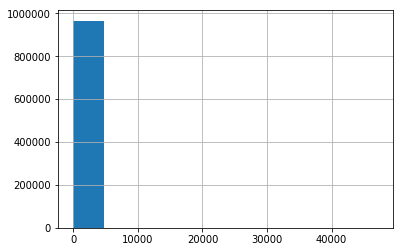

In [5]:
df.ENTRIES_COUNT.hist();

In [6]:
#adding column TOTAL_TRAFFIC by adding ENTRIES and EXITS
df['TOTAL_TRAFFIC'] = df['ENTRIES_COUNT'] + df['EXITS_COUNT']

In [7]:
#adding column to take datetime and output weekday name such as Monday, Tuesday, Wednesday, etc. 
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " +df.TIME, format="%m/%d/%Y %H:%M:%S")
df['day_of_week'] = df['DATE_TIME'].dt.weekday_name

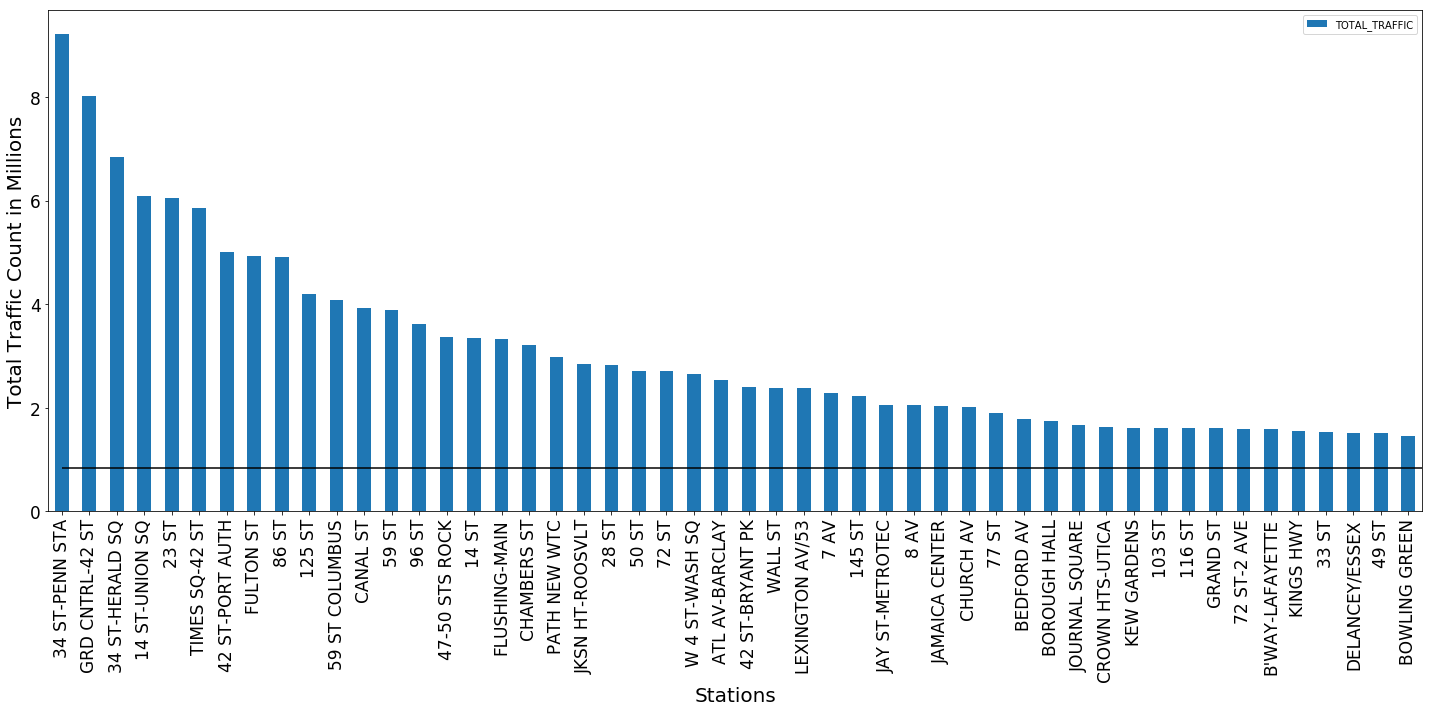

In [8]:
#creating top 50 stations graph
stations = df.groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'})

top_50 = stations.sort_values('TOTAL_TRAFFIC', ascending = False).head(50)
top_50_M = top_50/1000000
ax = top_50_M.plot.bar(figsize=(20,10))

#adding in line with the mean traffic count of all stations
plt.hlines(.83428501599999995, 0, 50)

ax.set_ylabel("Total Traffic Count in Millions", fontsize = 20)
ax.set_xlabel("Stations", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize= 17)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('top_50_stations_3.png')

In [9]:
stations['TOTAL_TRAFFIC'].mean()

833670.4053333333

In [10]:
#looking at top stations for Saturday traffic
saturday = df[df["day_of_week"] == "Saturday"].groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'}).sort_values('TOTAL_TRAFFIC', ascending = False)
saturday.head()

,TOTAL_TRAFFIC
STATION,
34 ST-PENN STA,816408.0
14 ST-UNION SQ,661173.0
34 ST-HERALD SQ,653583.0
TIMES SQ-42 ST,627136.0
42 ST-PORT AUTH,558460.0


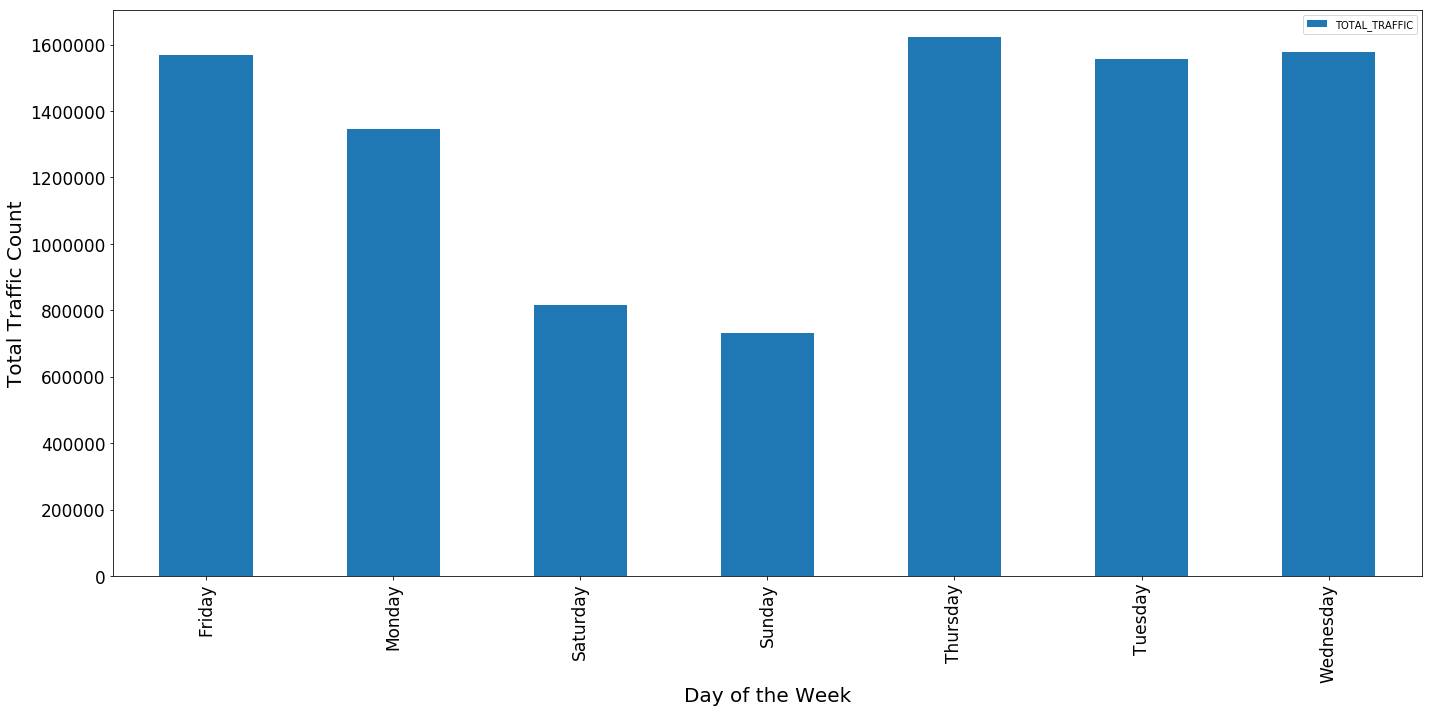

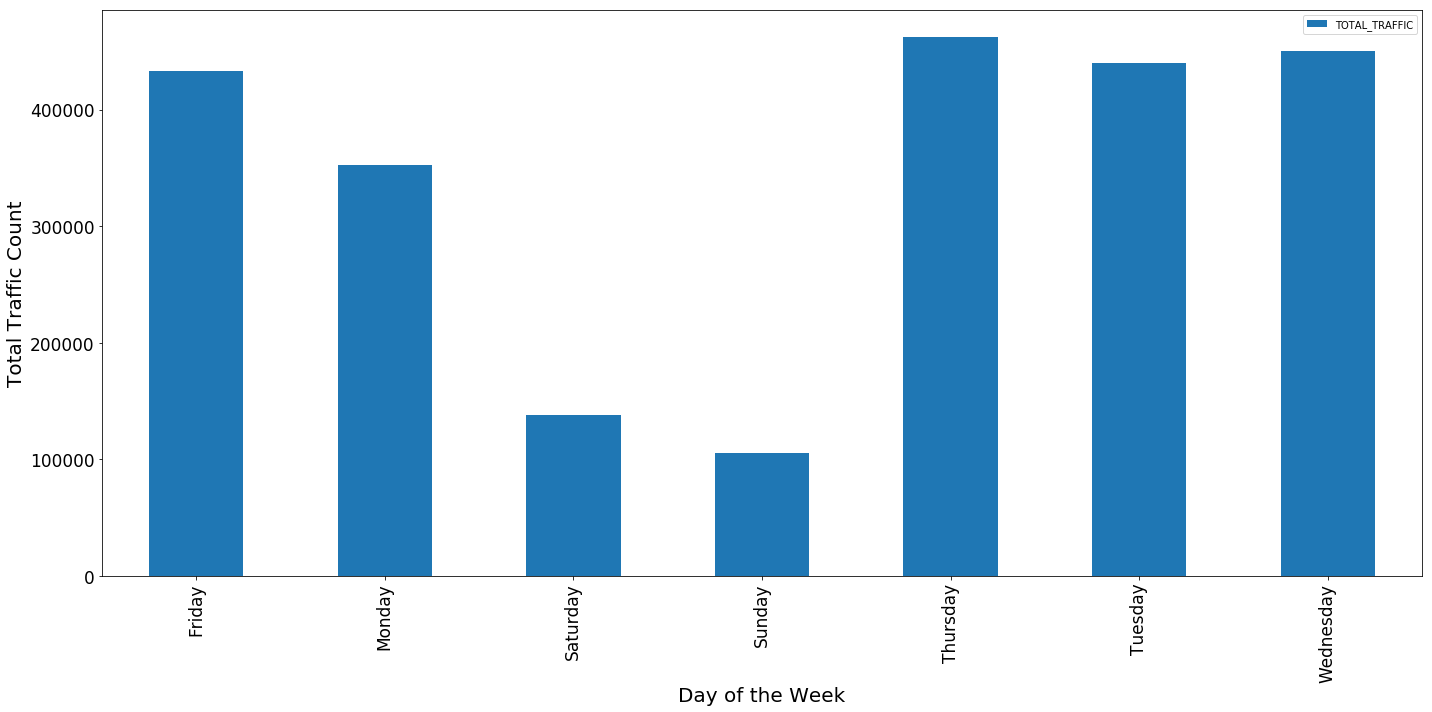

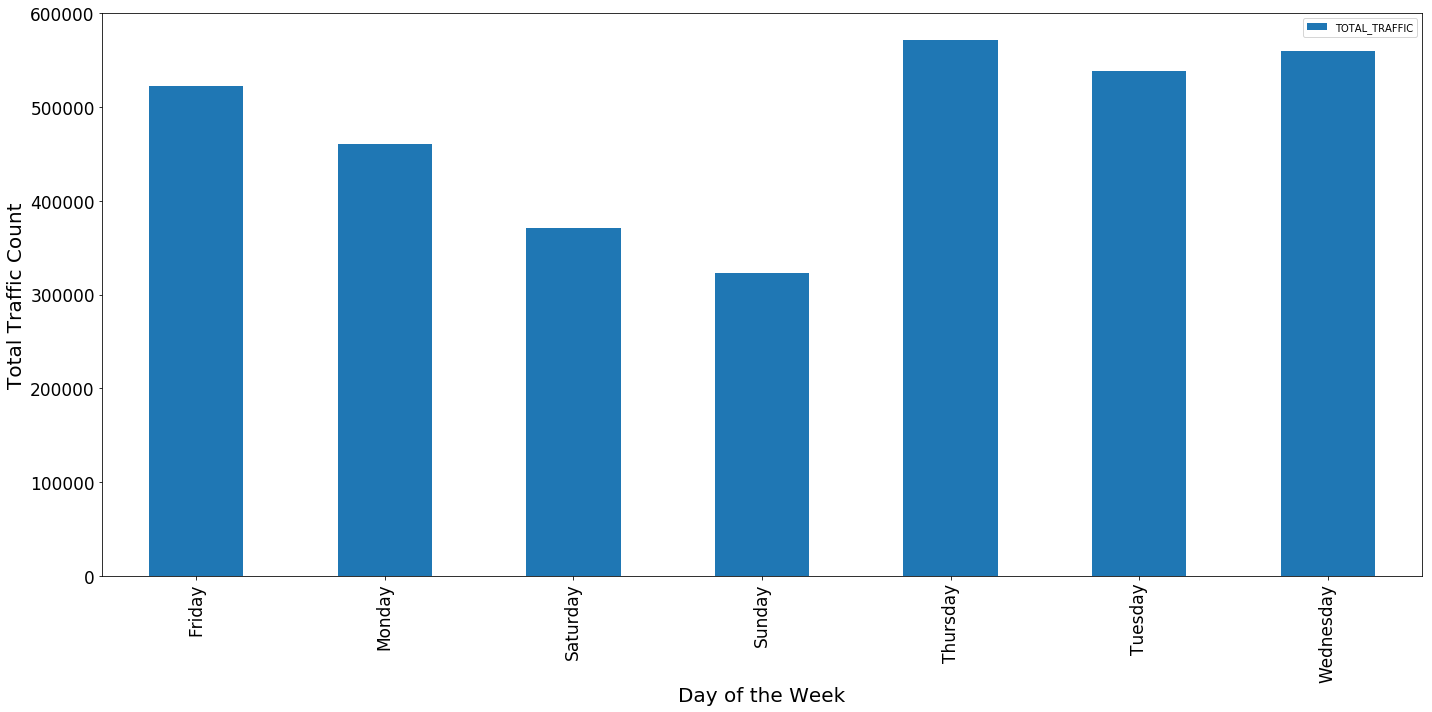

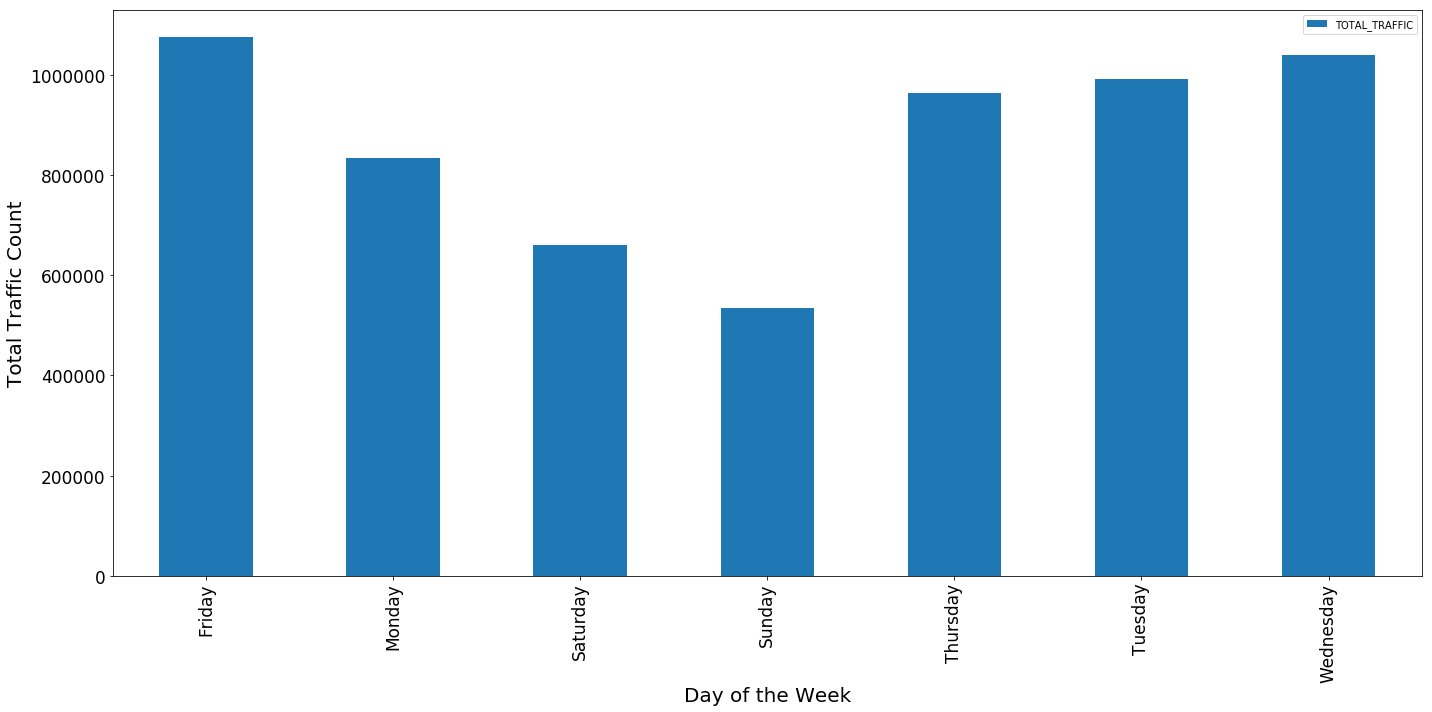

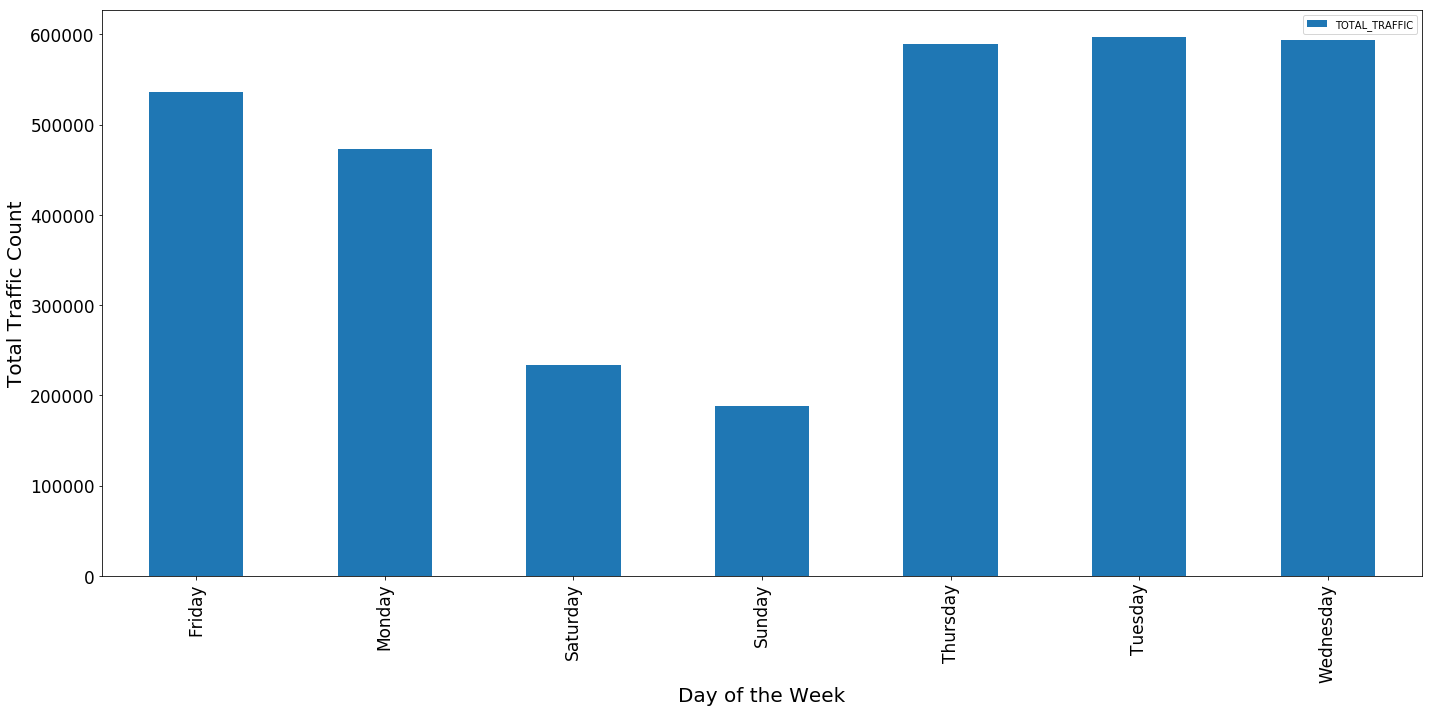

In [11]:
#creating day of the week charts for stations of interest
stations_of_interest = ['34 ST-PENN STA', 'LEXINGTON AV/53', '14 ST', '14 ST-UNION SQ', 'CHAMBERS ST']
for station in stations_of_interest:
    station_df = df[df["STATION"] == station]
    station_dow = station_df.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
    ax = station_dow.plot.bar(figsize=(20,10))
    
    ax.set_ylabel("Total Traffic Count", fontsize = 20)
    ax.set_xlabel("Day of the Week", fontsize = 20)
    ax.tick_params(axis = "both", which = "major", labelsize= 17)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(''.join((''.join(station.split( )).split('/')))+'.png')


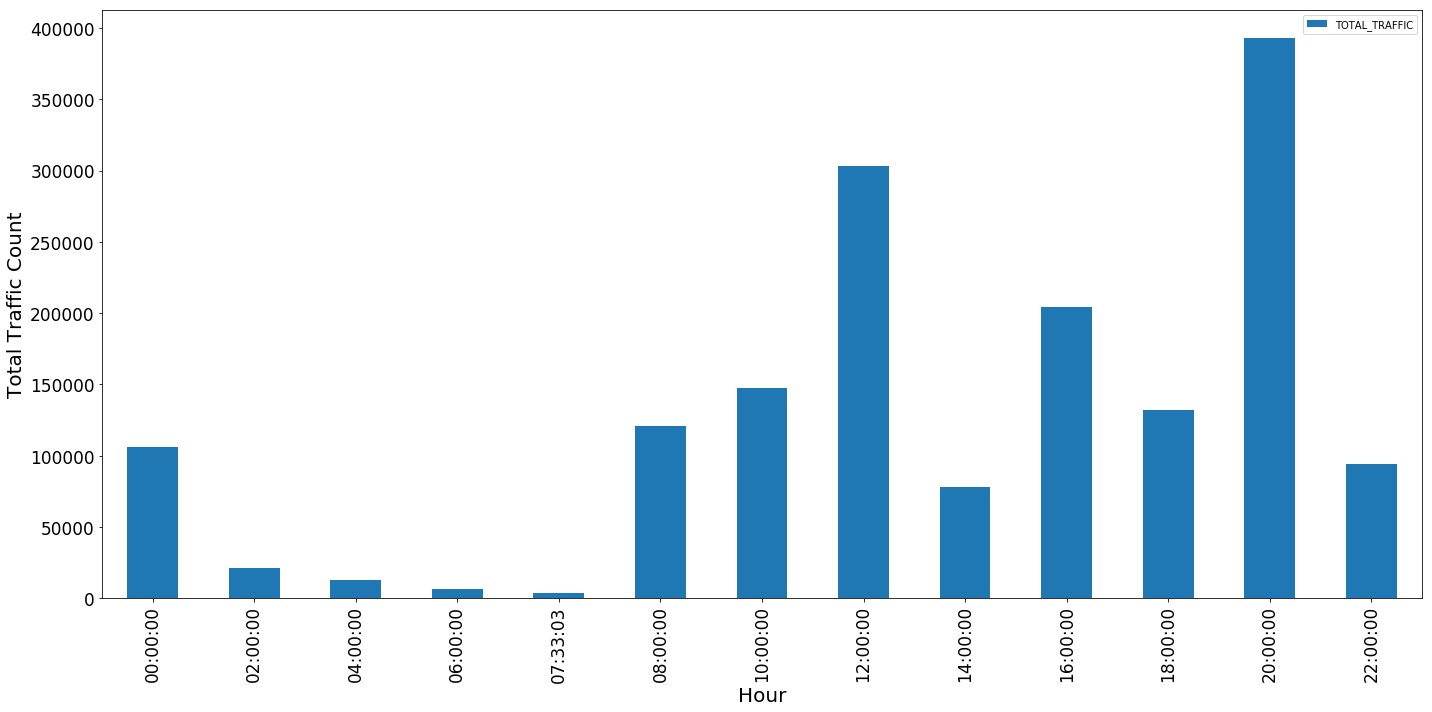

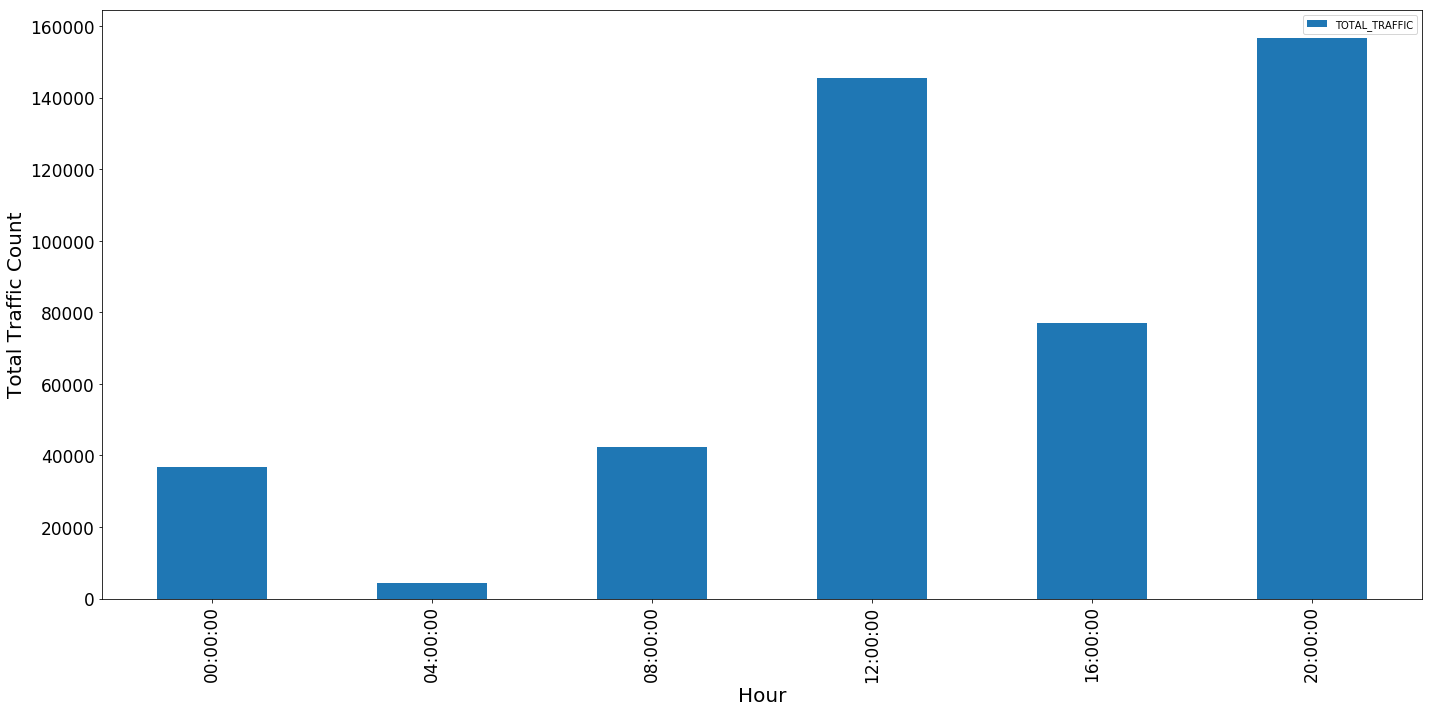

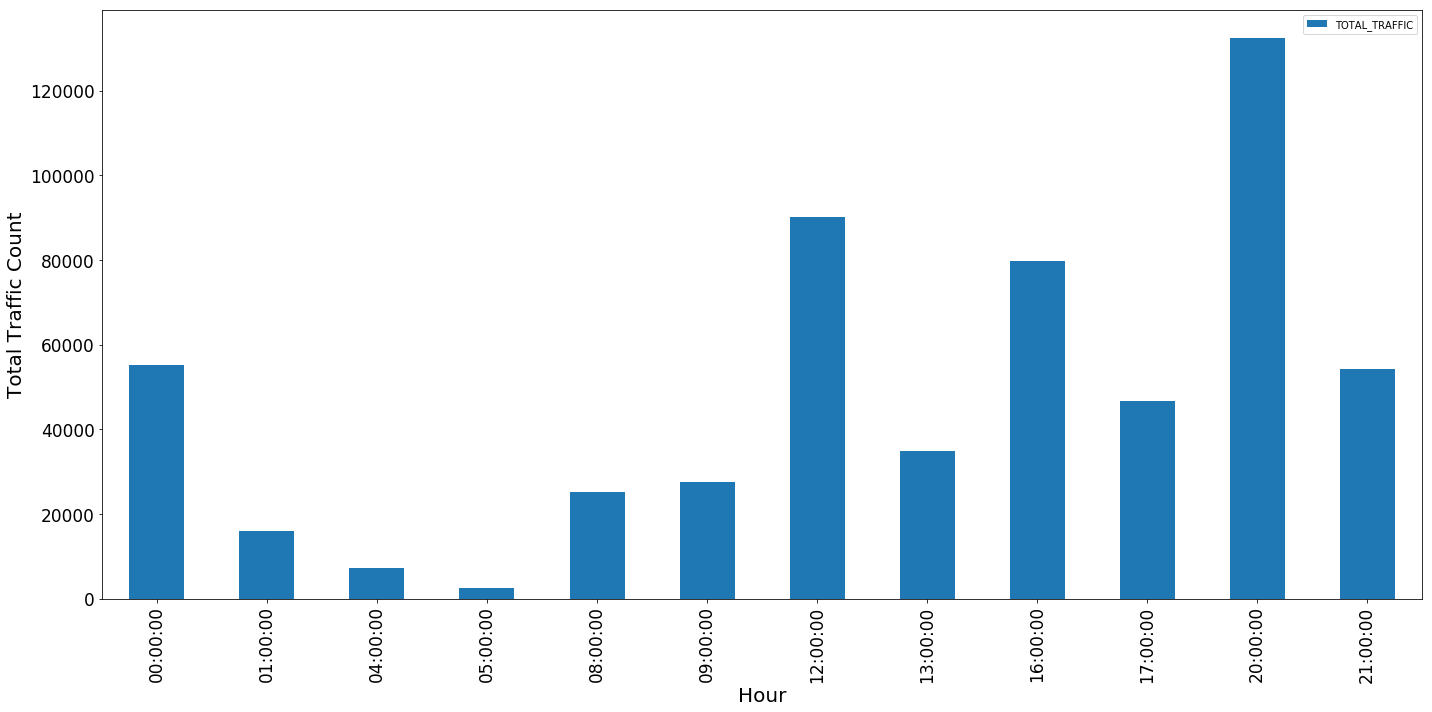

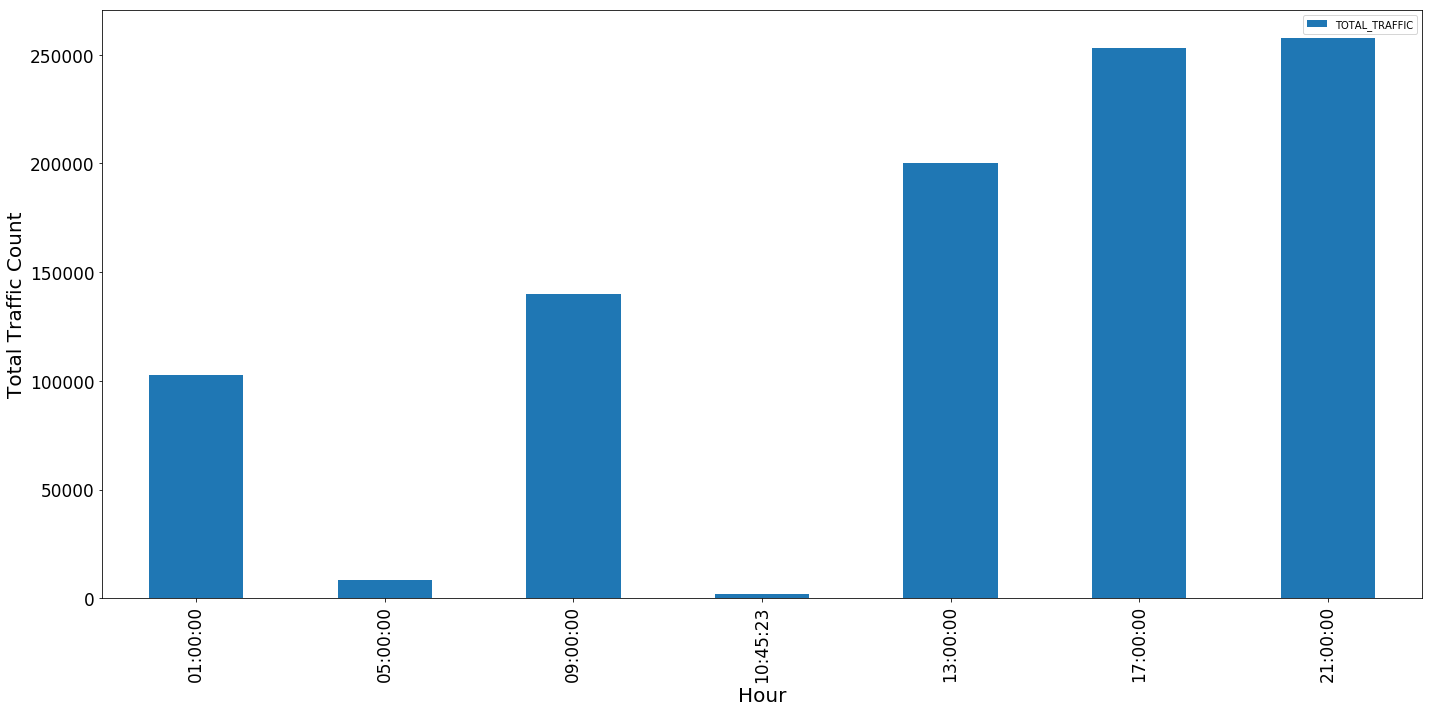

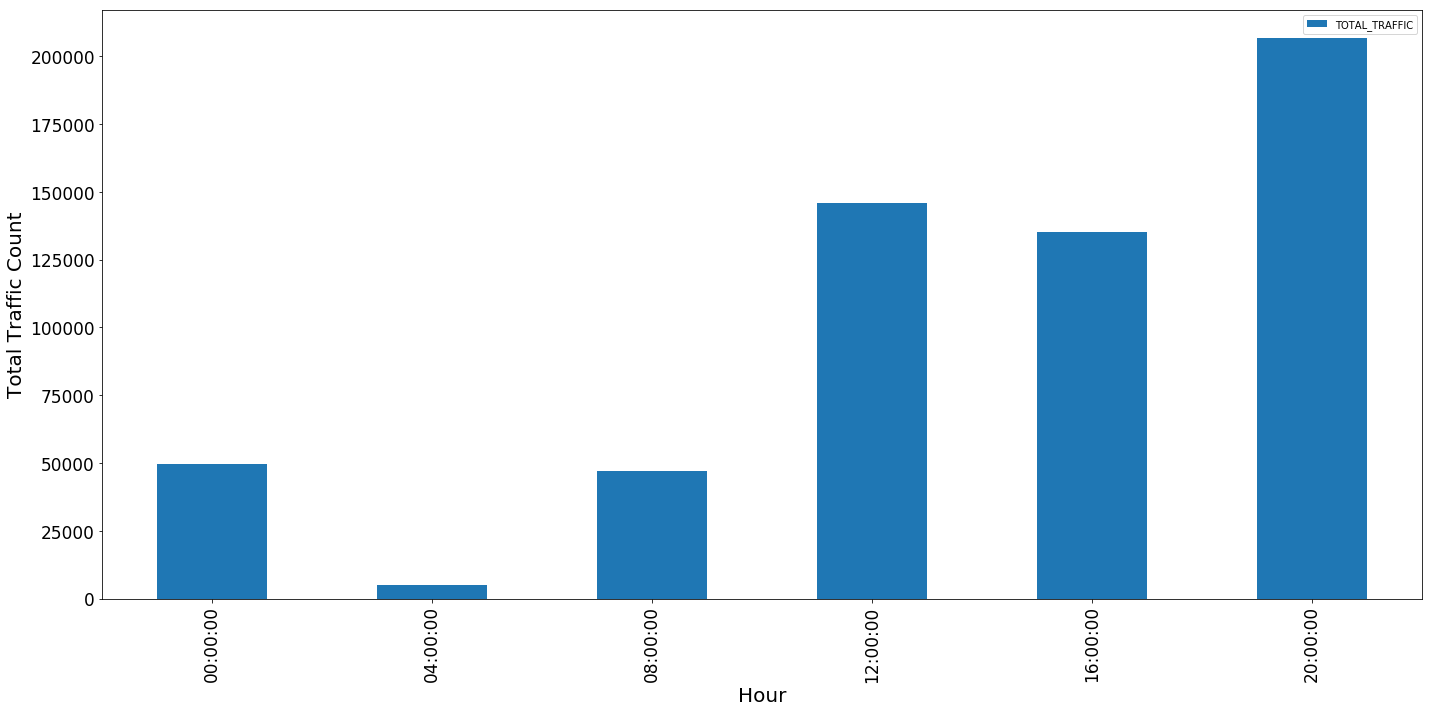

In [12]:
#creating Thursday hourly charts for stations of interest 
stations_of_interest = ['34 ST-PENN STA', 'LEXINGTON AV/53', '14 ST', '14 ST-UNION SQ', 'CHAMBERS ST']
for station in stations_of_interest:
    station_df = df[df["STATION"] == station]
    station_dow = station_df.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
    
    station_thursday = station_df[station_df["day_of_week"] == 'Thursday']
    station_thursday_hours = station_thursday.groupby(["TIME"]).agg({'TOTAL_TRAFFIC': 'sum'})
    
    ax = station_thursday_hours.plot.bar(figsize=(20,10))
    ax.set_ylabel("Total Traffic Count", fontsize = 20)
    ax.set_xlabel("Hour", fontsize = 20)
    ax.tick_params(axis = "both", which = "major", labelsize= 17)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(''.join((''.join(station.split( )).split('/')))+'.png')